In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [2]:
# Load dataset
df = pd.read_csv("ecommerce_sales.csv")

print(df.head())

   Order Date Product Name     Category Region  Quantity  Sales  Profit
0  31-12-2024      Printer       Office  North         4   3640  348.93
1  27-11-2022        Mouse  Accessories   East         7   1197  106.53
2  11-05-2022       Tablet  Electronics  South         5   5865  502.73
3  16-03-2024        Mouse  Accessories  South         2    786  202.87
4  10-09-2022        Mouse  Accessories   West         1    509  103.28


In [3]:
X = df[['Profit']]  
y = df['Sales']                  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Slope:", model.coef_)           #Slope (m) → how much Sales changes when Profit increases by 1
print("Intercept:", model.intercept_)       #Intercept (c) → Sales when Profit = 0


Slope: [4.00554604]
Intercept: 935.1116752391276


In [5]:
y_pred = model.predict(X_test)

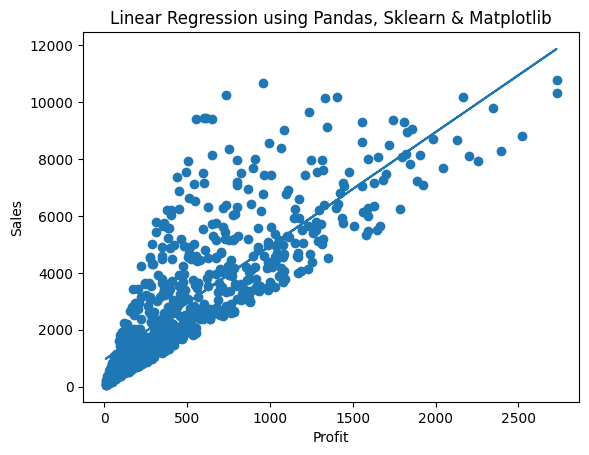

In [6]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.title("Linear Regression using Pandas, Sklearn & Matplotlib")
plt.show()

In [7]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.6837995601335434


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)


MSE : 10069637.477157775
MAE : 2485.1418642918406
RMSE: 3173.26920968861
R2  : -0.6050013103591623


In [10]:
df = pd.read_csv("ecommerce_sales.csv")  # Update with your actual file path
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (3500, 7)
   Order Date Product Name     Category Region  Quantity  Sales  Profit
0  31-12-2024      Printer       Office  North         4   3640  348.93
1  27-11-2022        Mouse  Accessories   East         7   1197  106.53
2  11-05-2022       Tablet  Electronics  South         5   5865  502.73
3  16-03-2024        Mouse  Accessories  South         2    786  202.87
4  10-09-2022        Mouse  Accessories   West         1    509  103.28


In [11]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2


Simple Linear Regression
MSE: 2158876.3333062017
MAE: 1061.4799386288182
RMSE: 1469.3115167677008
R2: 0.6558963168515319


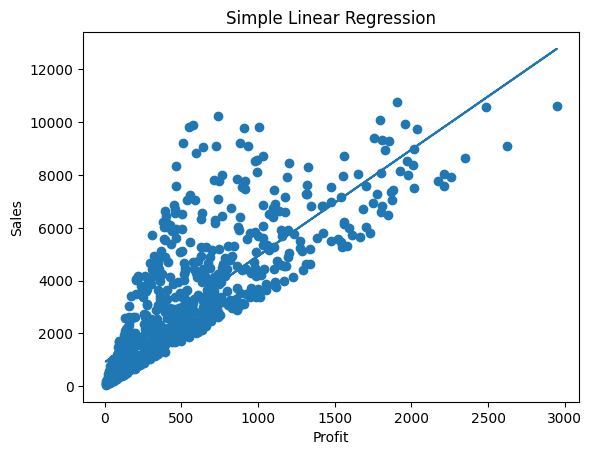

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
mse, mae, rmse, r2 = evaluate_model(y_test, y_pred_lr)
joblib.dump(model,"ecommerce_model.pkl")
print("Simple Linear Regression")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lr)
plt.title("Simple Linear Regression")
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.show()


Ridge Regression
MSE: 2158876.333344408
MAE: 1061.479938918011
RMSE: 1469.3115167807023
R2: 0.6558963168454424


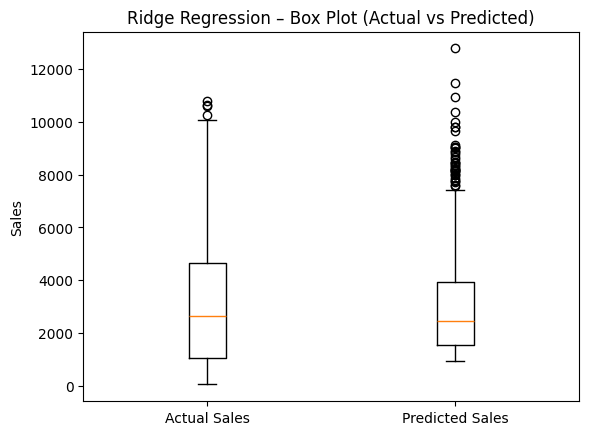

In [13]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)
mse, mae, rmse, r2 = evaluate_model(y_test, y_pred_ridge)

print("Ridge Regression")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


plt.boxplot([y_test.values, y_pred_ridge],
            tick_labels=["Actual Sales", "Predicted Sales"])

plt.title("Ridge Regression – Box Plot (Actual vs Predicted)")
plt.ylabel("Sales")
plt.show()



Lasso Regression
MSE: 2158876.3359615486
MAE: 1061.4799587275943
RMSE: 1469.3115176713034
R2: 0.6558963164282958


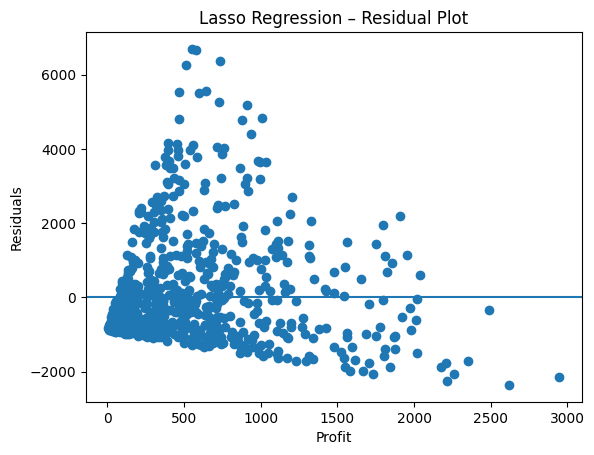

In [14]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
mse, mae, rmse, r2 = evaluate_model(y_test, y_pred_lasso)

print("Lasso Regression")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

residuals = y_test - y_pred_lasso

plt.scatter(X_test.values.flatten(), residuals)
plt.axhline(y=0)
plt.title("Lasso Regression – Residual Plot")
plt.xlabel("Profit")
plt.ylabel("Residuals")
plt.show()


ElasticNet Regression
MSE: 2158876.3399829455
MAE: 1061.4799891651091
RMSE: 1469.3115190397664
R2: 0.6558963157873247


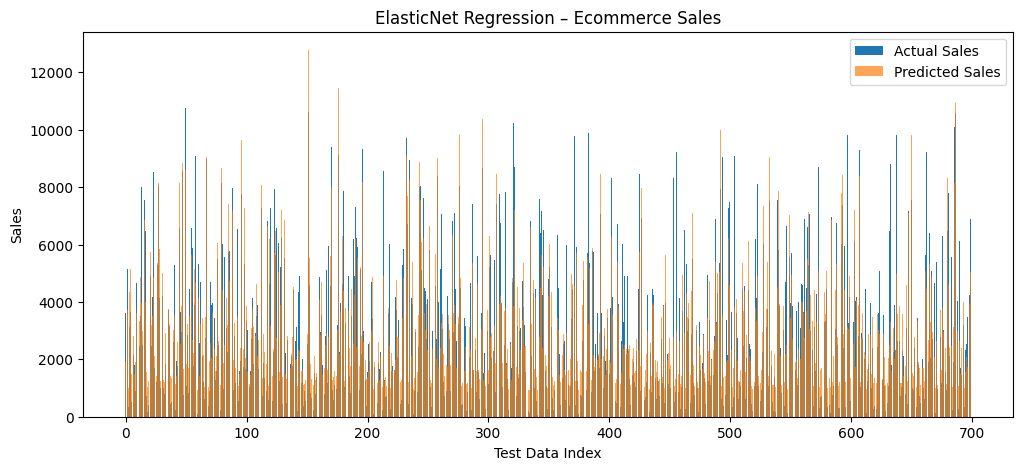

In [15]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)
mse, mae, rmse, r2 = evaluate_model(y_test, y_pred_elastic)

print("ElasticNet Regression")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

index = np.arange(len(y_test))

plt.figure(figsize=(12, 5))

plt.bar(index, y_test.values, label="Actual Sales")
plt.bar(index, y_pred_elastic, alpha=0.7, label="Predicted Sales")

plt.title("ElasticNet Regression – Ecommerce Sales")
plt.xlabel("Test Data Index")
plt.ylabel("Sales")
plt.legend()
plt.show()




In [16]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_iris(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0
